In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
plt.rcParams['figure.figsize'] = (10, 8)
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("/content"))

['.config', 'AQI_DATA.csv', 'sample_data']


In [4]:
data=pd.read_csv('/content/AQI_DATA.csv',encoding = "ISO-8859-1")
data.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",02-05-2024 00:00:00,16.515083,80.518167,CO,4.0,57.0,15.0
1,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",02-05-2024 00:00:00,14.675886,77.593027,PM2.5,27.0,74.0,52.0
2,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",02-05-2024 00:00:00,14.675886,77.593027,SO2,2.0,12.0,6.0
3,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",02-05-2024 00:00:00,14.675886,77.593027,CO,22.0,129.0,74.0
4,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",02-05-2024 00:00:00,14.465052,78.824187,PM10,19.0,119.0,57.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3284 non-null   object 
 1   state          3284 non-null   object 
 2   city           3284 non-null   object 
 3   station        3284 non-null   object 
 4   last_update    3284 non-null   object 
 5   latitude       3284 non-null   float64
 6   longitude      3284 non-null   float64
 7   pollutant_id   3284 non-null   object 
 8   pollutant_min  3049 non-null   float64
 9   pollutant_max  3049 non-null   float64
 10  pollutant_avg  3049 non-null   float64
dtypes: float64(5), object(6)
memory usage: 282.3+ KB


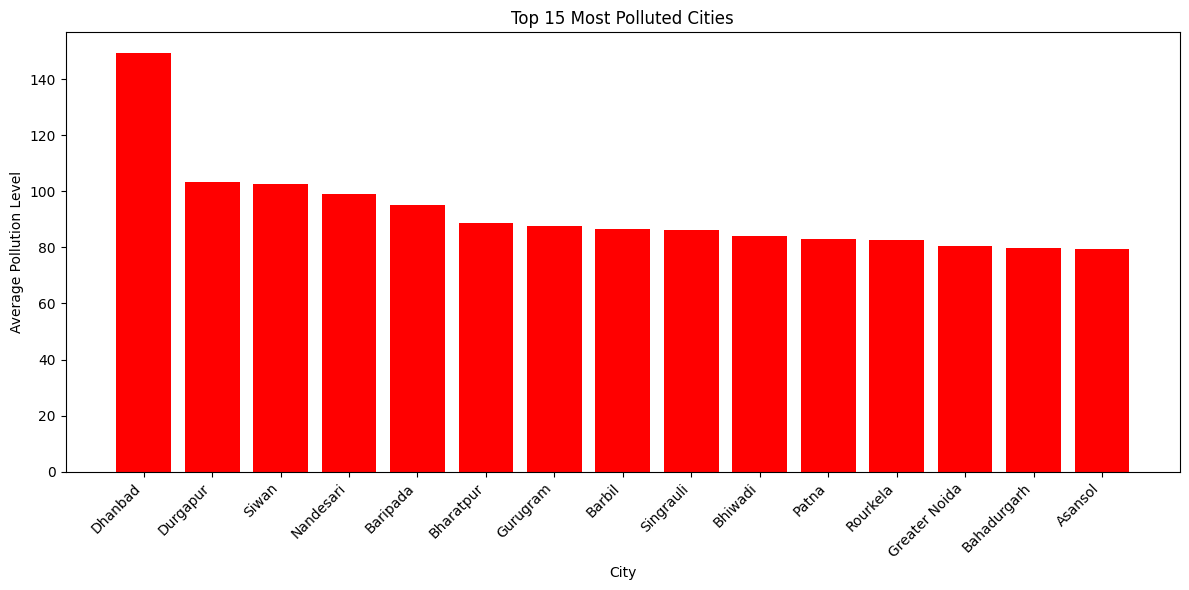

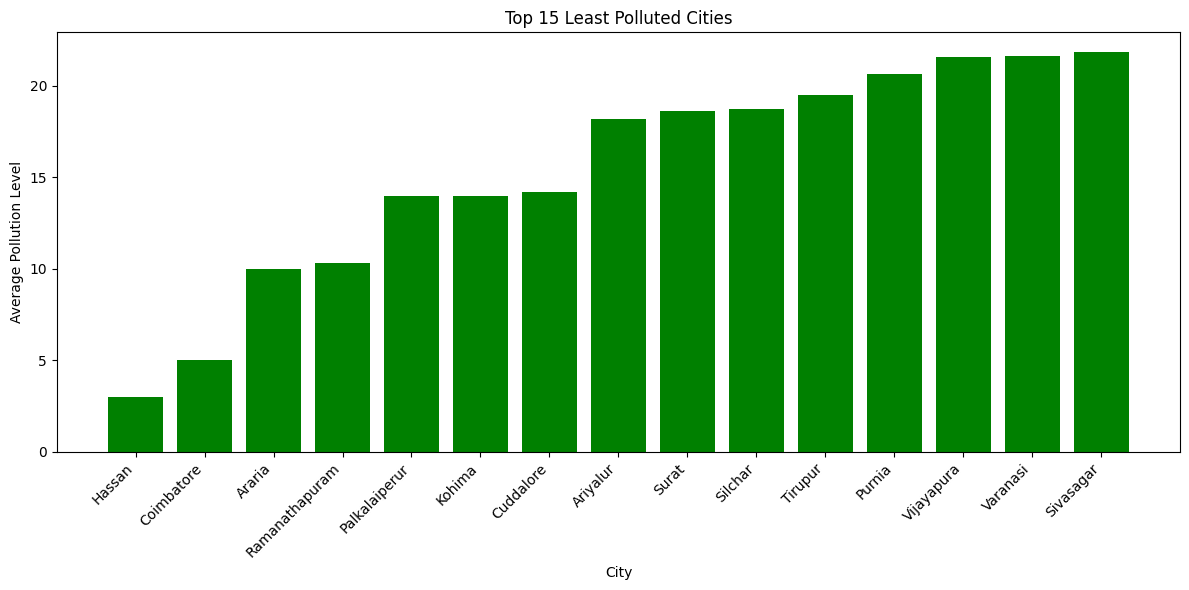

In [6]:
# Group by city and calculate average pollutant levels
city_pollution_avg = data.groupby('city')['pollutant_avg'].mean().reset_index()

# Sort by pollutant_avg in descending order to get the most polluted cities
most_polluted_cities = city_pollution_avg.sort_values(by='pollutant_avg', ascending=False).head(15)

# Sort by pollutant_avg in ascending order to get the least polluted cities
least_polluted_cities = city_pollution_avg.sort_values(by='pollutant_avg', ascending=True).head(15)

# Plot top 15 most polluted cities
plt.figure(figsize=(12, 6))
plt.bar(most_polluted_cities['city'], most_polluted_cities['pollutant_avg'], color='red')
plt.title('Top 15 Most Polluted Cities')
plt.xlabel('City')
plt.ylabel('Average Pollution Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Plot top 15 least polluted cities
plt.figure(figsize=(12, 6))
plt.bar(least_polluted_cities['city'], least_polluted_cities['pollutant_avg'], color='green')
plt.title('Top 15 Least Polluted Cities')
plt.xlabel('City')
plt.ylabel('Average Pollution Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
# Group by state or city and calculate average pollution levels
state_comparison = data.groupby('state').agg({'pollutant_avg': 'mean'}).reset_index()
# Plot using Plotly Express
fig1 = px.bar(state_comparison, x='state', y='pollutant_avg', title='State-wise Pollution Comparison')
fig1.show()

In [8]:
# Scatter plot of latitude vs longitude colored by pollution levels
fig = go.Figure(data=go.Scattergeo(
    lon=data['longitude'],
    lat=data['latitude'],
    mode='markers',
    marker=dict(color=data['pollutant_avg'], colorscale='Viridis', size=8),
))
fig.update_layout(title='Geographical Patterns of Pollution')
fig.show()
# Get top 10 and lowest 10 data points by pollution levels
top_10 = data.nlargest(10, 'pollutant_avg')
lowest_10 = data.nsmallest(10, 'pollutant_avg')

# Scatter plot of latitude vs longitude for top 10 and lowest 10
fig1 = go.Figure(data=go.Scattergeo(lon=top_10['longitude'], lat=top_10['latitude'], mode='markers', marker=dict(color=top_10['pollutant_avg'], colorscale='Viridis', size=8)))
fig1.update_layout(title='Top 10 Geographical Patterns of Pollution')
fig2 = go.Figure(data=go.Scattergeo(lon=lowest_10['longitude'], lat=lowest_10['latitude'], mode='markers', marker=dict(color=lowest_10['pollutant_avg'], colorscale='Viridis', size=8)))
fig2.update_layout(title='Lowest 10 Geographical Patterns of Pollution')
fig1.show()
fig2.show()


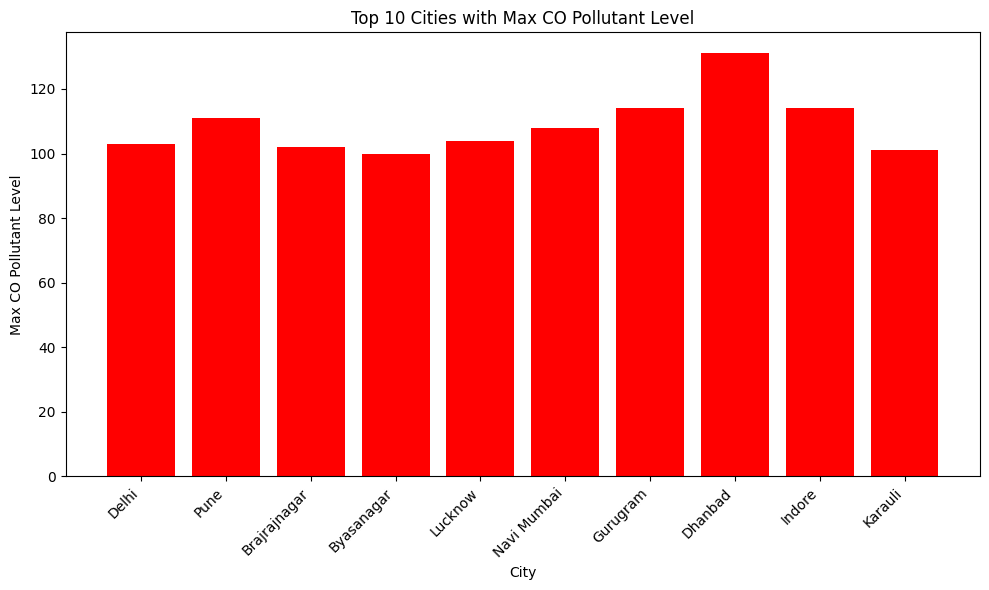

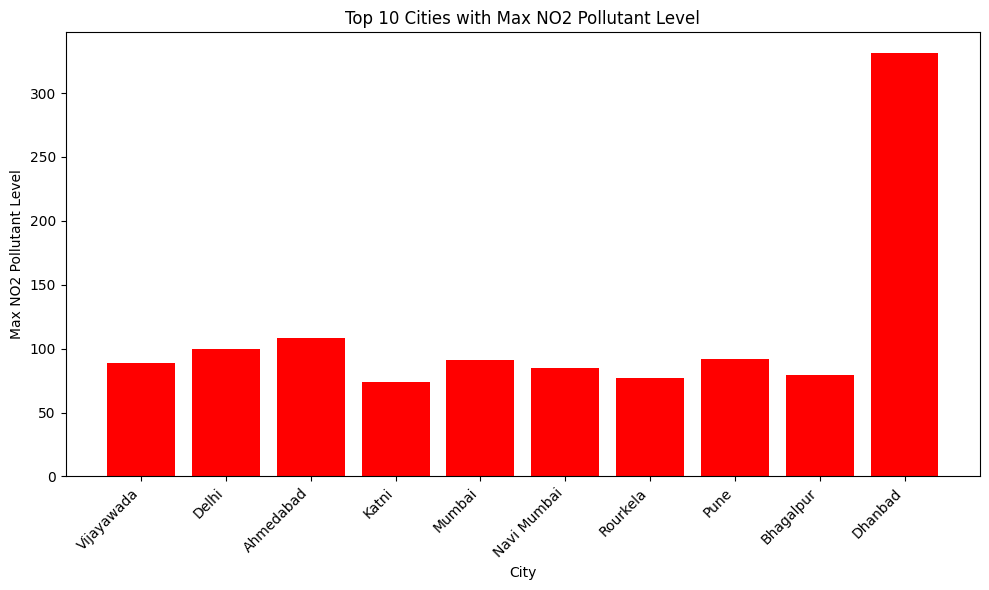

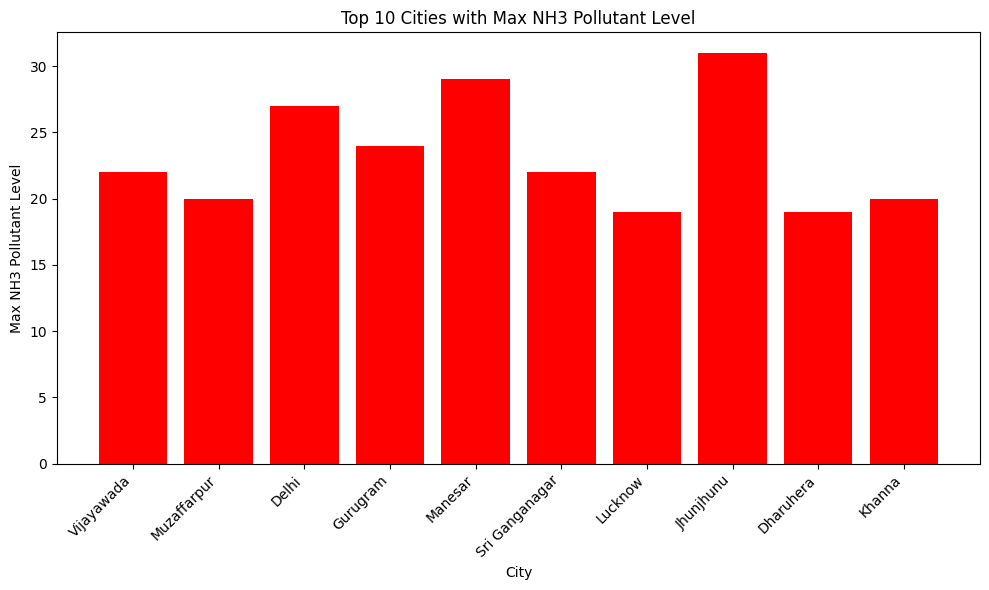

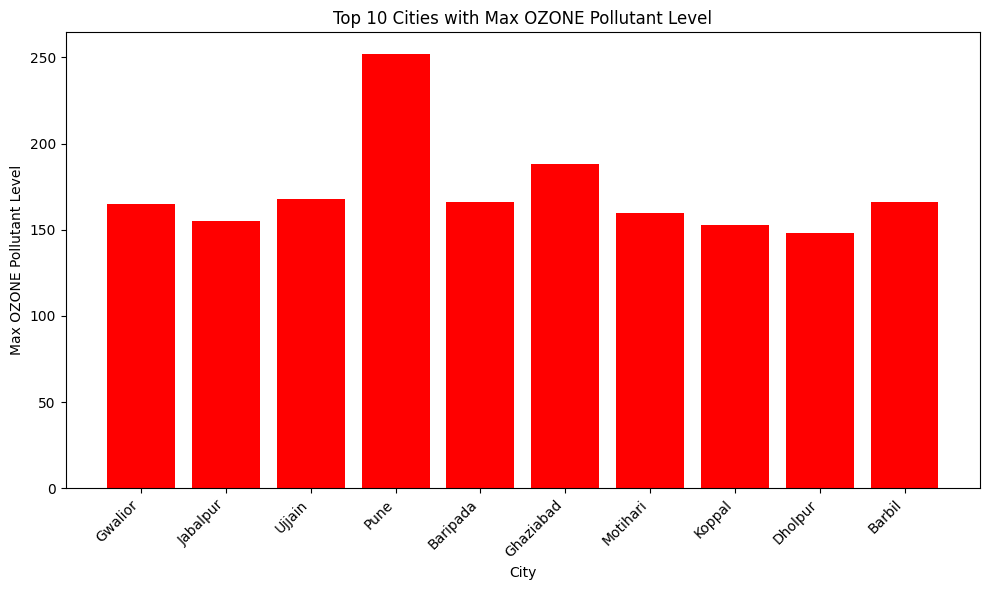

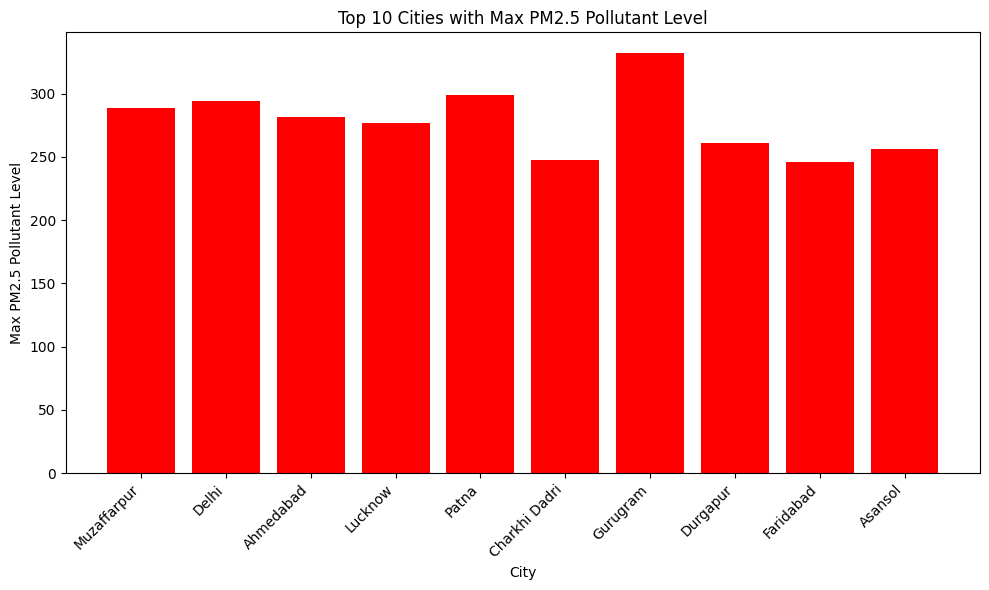

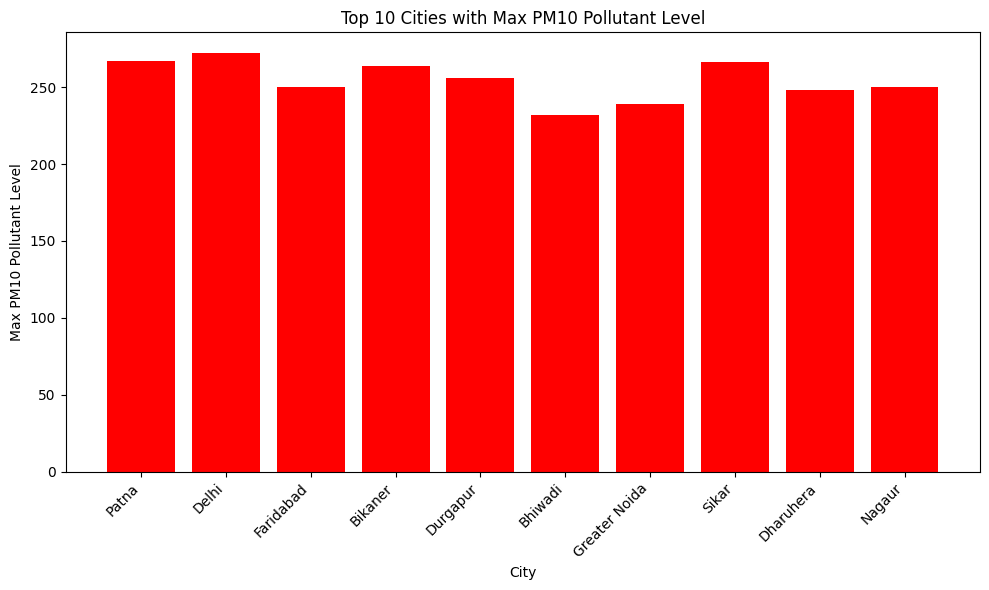

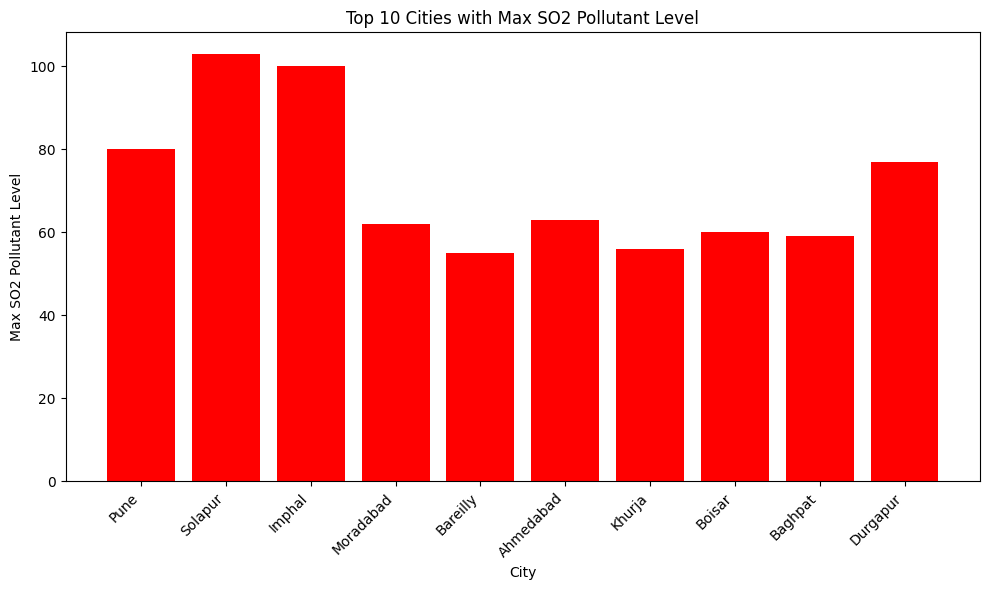

In [9]:
# Define a list of pollutant IDs
pollutant_ids = ['CO', 'NO2', 'NH3', 'OZONE', 'PM2.5', 'PM10', 'SO2']

# Iterate through each pollutant ID
for pollutant_id in pollutant_ids:
    # Filter data for the current pollutant
    pollutant_data = data[data['pollutant_id'] == pollutant_id]

    # Get the top 10 cities with the maximum pollutant levels
    top_cities = pollutant_data.groupby('city')['pollutant_avg'].max().nlargest(10).index

    # Filter data for the top 10 cities
    top_cities_data = pollutant_data[pollutant_data['city'].isin(top_cities)]

    # Plot the max pollutant levels for the top 10 cities
    plt.figure(figsize=(10, 6))
    plt.bar(top_cities_data['city'], top_cities_data['pollutant_avg'], color='red')
    plt.title(f'Top 10 Cities with Max {pollutant_id} Pollutant Level')
    plt.xlabel('City')
    plt.ylabel(f'Max {pollutant_id} Pollutant Level')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [10]:
# Calculate mean pollutant_avg for each pollutant_id
pollutants_analysis = data.groupby('pollutant_id').agg({'pollutant_avg': 'mean'}).reset_index()

# Plot using Plotly Express
fig1 = px.bar(pollutants_analysis, x='pollutant_id', y='pollutant_avg', title='Average Levels of Pollutants by ID')
fig1.show()

In [11]:
# Group by city or state and pollutant, then calculate average pollutant levels
pollutant_concentration = data.groupby(['city', 'state', 'pollutant_id']).agg({'pollutant_avg': 'mean'}).reset_index()

# Plot using Plotly Express
fig = px.bar(pollutant_concentration, x='pollutant_id', y='pollutant_avg', color='state', title='Pollutant Concentration Variation')
fig.show()